# Лабораторная работа №4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/diabetes.csv')
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.


Проверим наличие пропущенных значений в датасете:

In [2]:
print("Пропуски до обработки:\n", data.isnull().sum(), "\n")

Пропуски до обработки:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64 



Пропущенных значений нет.

Заменить нулевые значения в некоторых столбцах на NaN, так как нули в этих признаках означают отсутствие измерения.

In [3]:
cols_with_zeros = [
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI'
]

data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)

print("Пропуски после замены нулей на NaN:\n", data.isnull().sum(), "\n")

Пропуски после замены нулей на NaN:
 Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Outcome            0
dtype: int64 



В нашем датасете все признаки числовые, кроме целевого Outcome, кодировать ничего не нужно.

## Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили), постройте 3d-визуализацию признаков.

Получим статистику по датасету:

In [4]:
stats = data.describe()
print(stats)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age     Outcome  
count  757.000000  768.000000  768.000000  768.000000  
mean    32.457464    0.471876   33.240885    0.348958  
std      6.924988    0.331329   11.760232    0.476951  
min     18.200000    0.078000   21.000000    0.000000  
25%     27.500000    0.243750   24.

Построим гистограммы и boxplot для всех признаков:

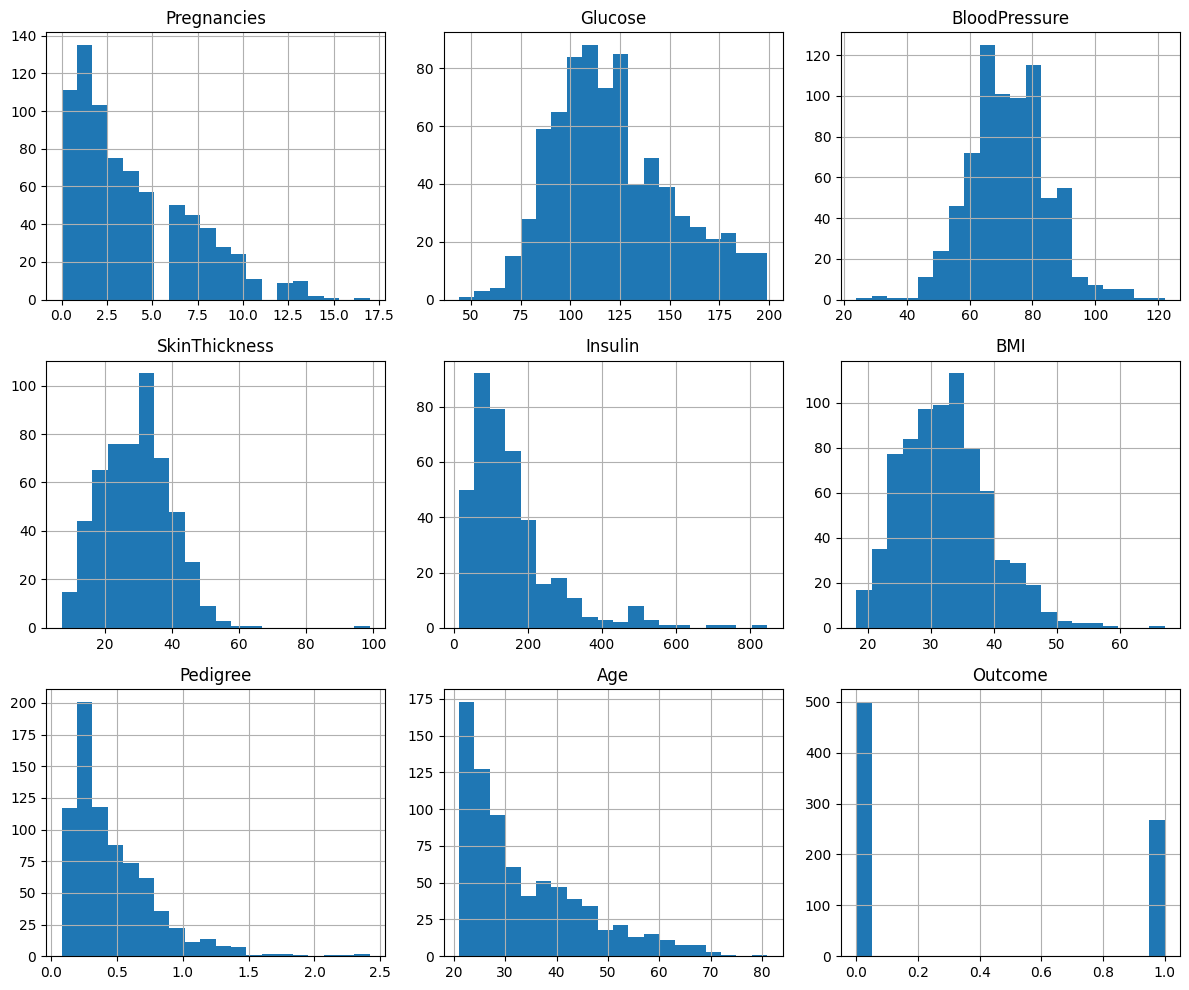

<Figure size 1200x600 with 0 Axes>

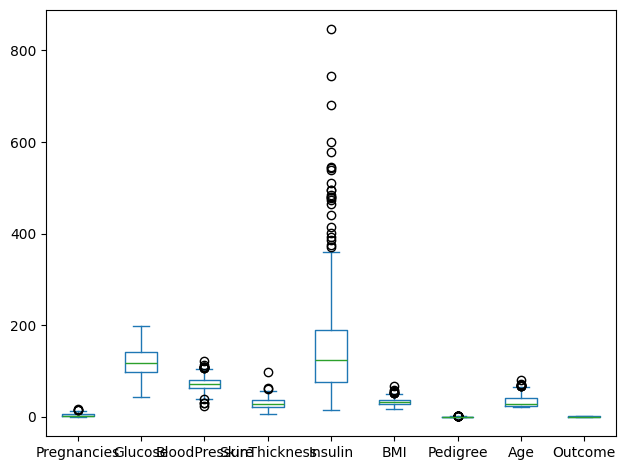

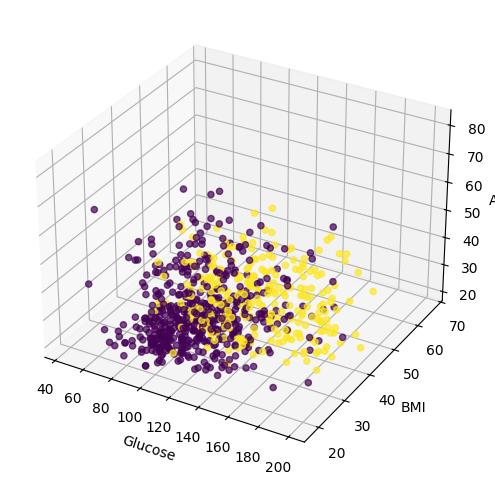

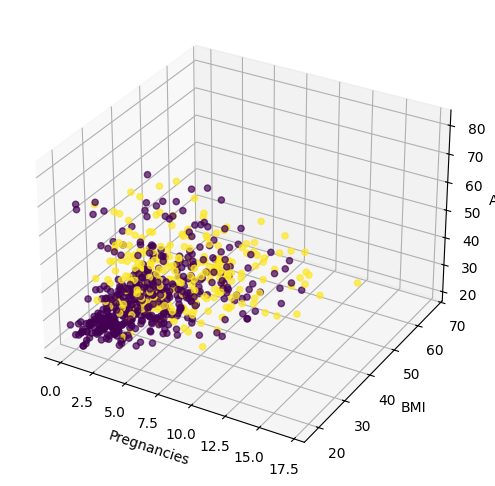

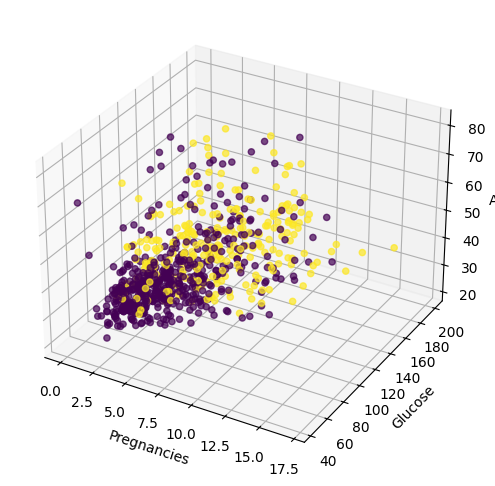

In [5]:
data.hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
data.plot(kind='box')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = data['Glucose']
y = data['BMI']
z = data['Age']

ax.scatter(x, y, z, c=data['Outcome'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = data['Pregnancies']
y = data['BMI']
z = data['Age']

ax.scatter(x, y, z, c=data['Outcome'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Pregnancies')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x = data['Pregnancies']
y = data['Glucose']
z = data['Age']

ax.scatter(x, y, z, c=data['Outcome'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Pregnancies')
ax.set_ylabel('Glucose')
ax.set_zlabel('Age')
plt.show()

Построим матрицу крорреляций признаков:

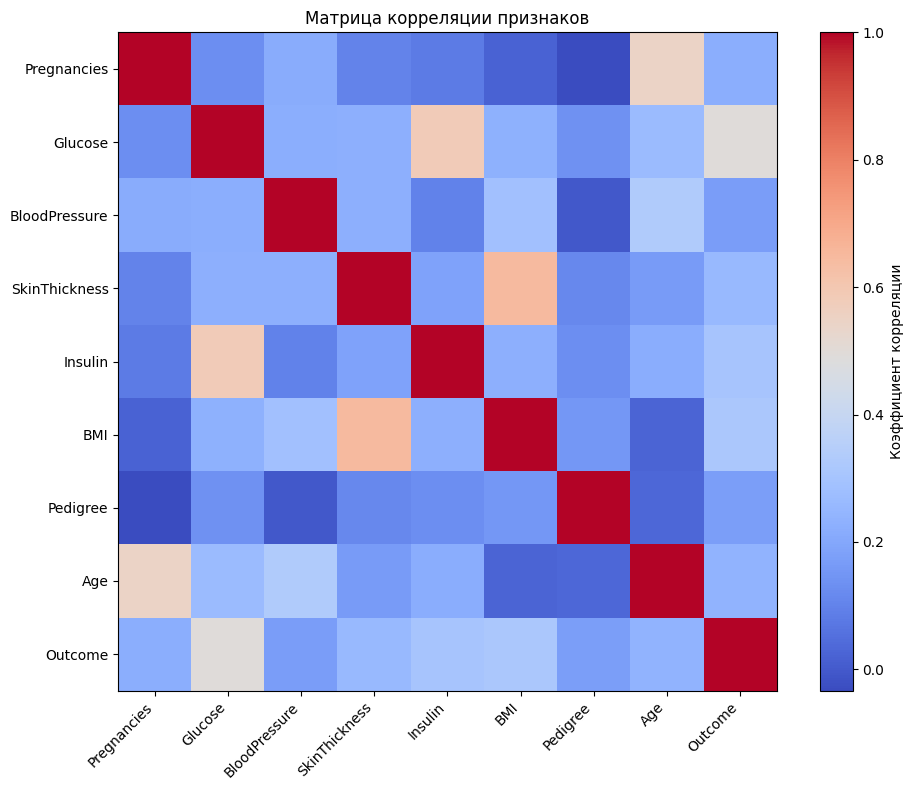

In [6]:
corr_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Коэффициент корреляции')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Матрица корреляции признаков")
plt.tight_layout()
plt.show()

Выполним min-max масштабирование для всех признаков, кроме целевого Outcome:

$$ X_{\text{norm}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}} $$

In [7]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_norm = X.copy()
for col in X.columns:
    min_val = X[col].min()
    max_val = X[col].max()
    X_norm[col] = (X[col] - min_val) / (max_val - min_val)

data_norm = pd.concat([X_norm, y], axis=1)

print(data_norm.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348       NaN  0.314928   
1     0.058824  0.264516       0.428571       0.239130       NaN  0.171779   
2     0.470588  0.896774       0.408163            NaN       NaN  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   Pedigree       Age  Outcome  
0  0.234415  0.483333        1  
1  0.116567  0.166667        0  
2  0.253629  0.183333        1  
3  0.038002  0.000000        0  
4  0.943638  0.200000        1  


Все значения в диапазоне [0, 1].

Получим статистику по нормализованному датасету:

In [8]:
stats = data_norm.describe()
print(stats)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      0.226180    0.501205       0.493930       0.240798    0.170130   
std       0.198210    0.197004       0.126349       0.113880    0.142759   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.058824    0.354839       0.408163       0.163043    0.074820   
50%       0.176471    0.470968       0.489796       0.239130    0.133413   
75%       0.352941    0.625806       0.571429       0.315217    0.211538   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI    Pedigree         Age     Outcome  
count  757.000000  768.000000  768.000000  768.000000  
mean     0.291564    0.168179    0.204015    0.348958  
std      0.141615    0.141473    0.196004    0.476951  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.190184    0.070773    0.

Построим гистограммы и boxplot для всех признаков нормализованного датасета:

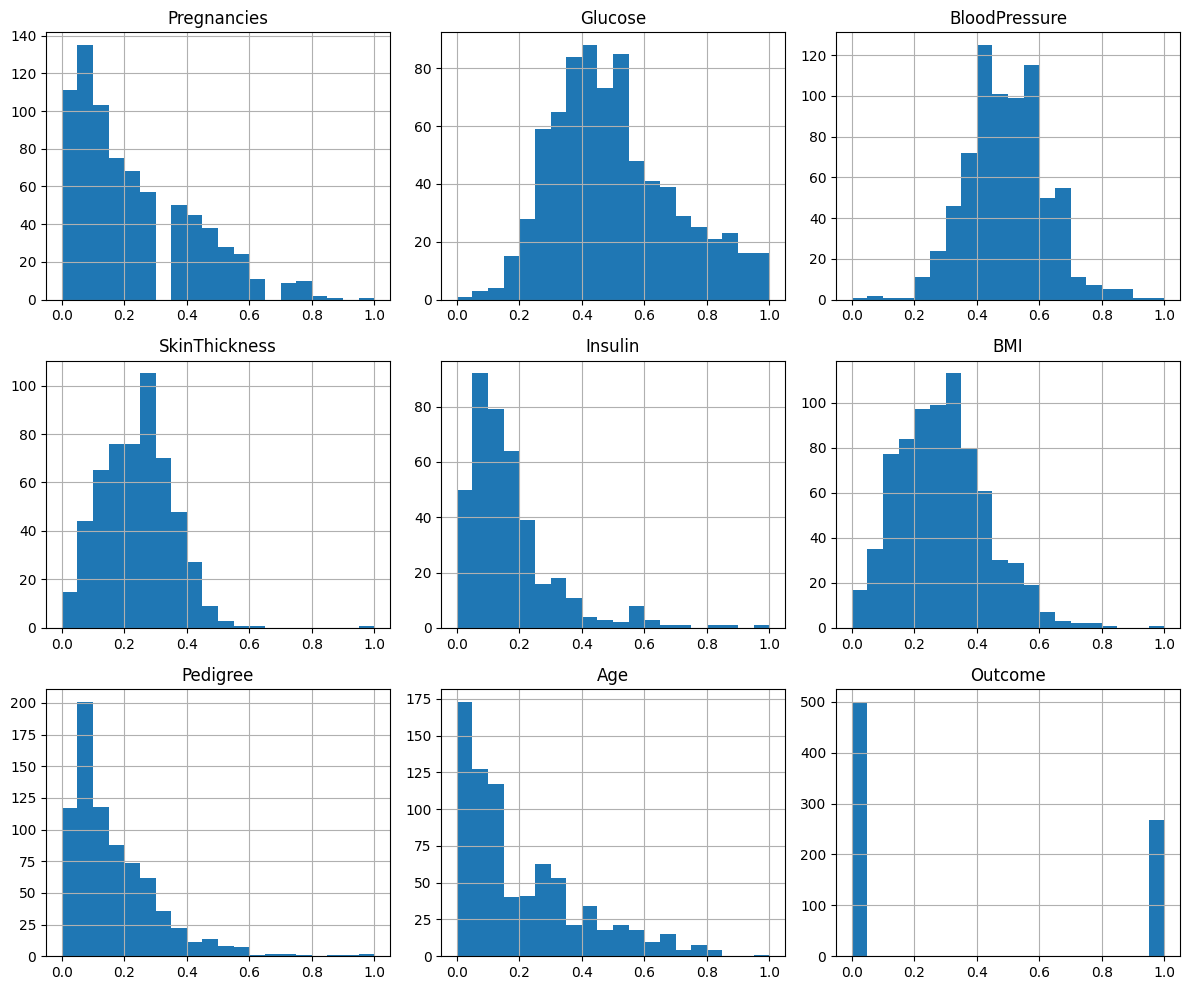

<Figure size 1200x600 with 0 Axes>

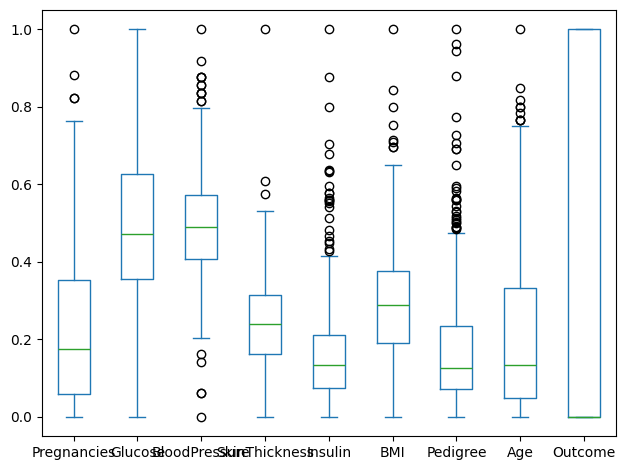

In [9]:
data_norm.hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
data_norm.plot(kind='box')
plt.tight_layout()
plt.show()

## Реализуйте метод k-ближайших соседей ****без использования сторонних библиотек, кроме NumPy и Pandas.


Перед обучением разделим данные на обучающую и тестовую выборки (80/20), выполним нормализацию на обучающей выборке и применим те же параметры нормализации к тестовой выборке.

Датасет разделяется на обучающую выборку $X_{\text{train}}, y_{\text{train}}$
и тестовую выборку $X_{\text{test}}, y_{\text{test}}$.
Разделение выполняется случайным образом с фиксированным генератором случайных чисел
для воспроизводимости результатов.

In [10]:
X_df = data.drop('Outcome', axis=1).copy()
y_sr = data['Outcome'].astype(int).copy()

def train_test_split_df(X: pd.DataFrame, y: pd.Series, seed=42, test_size=0.2):
    n = len(X)
    rng = np.random.default_rng(seed)
    idx = np.arange(n)
    rng.shuffle(idx)
    cut = int(n * (1 - test_size))
    train_idx, test_idx = idx[:cut], idx[cut:]
    return (X.iloc[train_idx].reset_index(drop=True),
            X.iloc[test_idx].reset_index(drop=True),
            y.iloc[train_idx].reset_index(drop=True),
            y.iloc[test_idx].reset_index(drop=True))

def fit_minmax(X: pd.DataFrame):
    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    denom = (maxs - mins).replace(0, 1.0)
    return mins, denom

def transform_minmax(X: pd.DataFrame, mins: pd.Series, denom: pd.Series):
    return (X - mins) / denom

X_train_df, X_test_df, y_train_sr, y_test_sr = train_test_split_df(X_df, y_sr, seed=42, test_size=0.2)
mins, denom = fit_minmax(X_train_df)
X_train_norm = transform_minmax(X_train_df, mins, denom)
X_test_norm  = transform_minmax(X_test_df,  mins, denom)

print("HEAD (train, norm):")
display(X_train_norm.head())
print("DESCRIBE (train, norm):")
display(X_train_norm.describe().T)

HEAD (train, norm):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
0,0.000000,0.883871,0.690476,0.402174,0.596154,0.609223,0.061486,0.083333
1,0.058824,0.645161,0.619048,0.358696,NaN,0.560680,0.225875,0.116667
2,0.235294,0.658065,0.738095,NaN,NaN,0.315534,0.196840,0.666667
3,0.529412,0.722581,0.666667,0.228261,0.169471,0.390777,0.474381,0.350000
4,0.117647,0.535484,0.333333,0.184783,0.313702,0.230583,0.649872,0.066667


DESCRIBE (train, norm):


,count,mean,std,min,25%,50%,75%,max
Pregnancies,614.0,0.227630,0.200357,0.0,0.058824,0.176471,0.352941,1.0
Glucose,613.0,0.505836,0.197663,0.0,0.361290,0.477419,0.632258,1.0
BloodPressure,592.0,0.501005,0.140767,0.0,0.404762,0.500000,0.595238,1.0
SkinThickness,438.0,0.239800,0.115067,0.0,0.152174,0.239130,0.315217,1.0
Insulin,322.0,0.173771,0.146194,0.0,0.077224,0.134615,0.212440,1.0
BMI,606.0,0.345670,0.166482,0.0,0.223301,0.343447,0.446602,1.0
Pedigree,614.0,0.167568,0.141498,0.0,0.071307,0.124680,0.229184,1.0
Age,614.0,0.206786,0.199399,0.0,0.050000,0.133333,0.316667,1.0


Для классификации нового объекта алгоритм ищет $k$ наиболее близких обучающих
примеров и относит данный объект к тому классу, который наиболее часто встречается среди этих соседей.

Пусть обучающая выборка состоит из $N$ объектов:
$$
\mathcal{D} = \{(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N)\},
$$
где $x_i \in \mathbb{R}^m$ — вектор признаков, а $y_i \in \{0,1\}$ — метка класса.
Для нового объекта $x^*$ вычисляется расстояние до всех точек обучающей выборки.
В данной работе используется евклидово расстояние:

$$
d(x^*, x_i) = \sqrt{\sum_{j=1}^{m} (x_j^* - x_{ij})^2}.
$$

Затем выбираются индексы $k$ ближайших соседей:
$$
N_k(x^*) = \operatorname{arg\,min}_{i_1,\dots,i_k} d(x^*, x_{i_j}).
$$

Класс нового объекта определяется по большинству меток среди найденных соседей:
$$
\hat{y}(x^*) =
\begin{cases}
1, & \text{если } \frac{1}{k} \sum\limits_{i \in N_k(x^*)} y_i \ge 0.5,\\
0, & \text{иначе.}
\end{cases}
$$

Для оценки эффективности классификации используется метрика точность:
$$
\text{Accuracy} = \frac{1}{n_{\text{test}}}
\sum_{i=1}^{n_{\text{test}}} [y_i = \hat{y}_i],
$$
где $[y_i = \hat{y}_i] = 1$, если предсказание совпадает с истинной меткой, и $0$ иначе.
Эта метрика отражает долю правильно классифицированных примеров на тестовой выборке.

Для анализа ошибок классификации строится матрица ошибок:
$$
\begin{bmatrix}
\text{TP} & \text{FN} \\
\text{FP} & \text{TN}
\end{bmatrix},
$$
где:
- TP (True Positive) — число объектов класса 1, правильно классифицированных;
- TN (True Negative) — число объектов класса 0, правильно классифицированных;
- FP (False Positive) — объекты класса 0, ошибочно отнесённые к 1;
- FN (False Negative) — объекты класса 1, ошибочно отнесённые к 0.


In [11]:
def knn_predict_batch(X_train_np, y_train_np, X_test_np, k=5):
    preds = np.empty(X_test_np.shape[0], dtype=int)
    for i, x in enumerate(X_test_np):
        dists = np.sqrt(np.sum((X_train_np - x) ** 2, axis=1))
        nn_idx = np.argpartition(dists, kth=k-1)[:k]
        labels = y_train_np[nn_idx]
        counts = np.bincount(labels)
        if (counts.max() != 0) and (np.sum(counts == counts.max()) == 1):
            preds[i] = np.argmax(counts)
        else:
            preds[i] = int(np.rint(labels.mean()))
    return preds

def accuracy_score(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=int)
    y_pred = np.asarray(y_pred, dtype=int)
    return (y_true == y_pred).mean()

def confusion_matrix_df(y_true, y_pred, labels=(0, 1)):
    ct = pd.crosstab(
        pd.Series(y_true, name='True').astype(pd.CategoricalDtype(categories=labels)),
        pd.Series(y_pred, name='Pred').astype(pd.CategoricalDtype(categories=labels)),
        dropna=False
    )
    return ct.reindex(index=labels, columns=labels, fill_value=0)

def run_knn_report(features, k=5, seed=42):
    X_train_df, X_test_df, y_train_sr, y_test_sr = train_test_split_df(X_df, y_sr, seed=seed, test_size=0.2)
    y_train_sr = y_train_sr.astype(int)
    y_test_sr = y_test_sr.astype(int)

    mins, denom = fit_minmax(X_train_df)
    X_train_norm = transform_minmax(X_train_df, mins, denom)
    X_test_norm  = transform_minmax(X_test_df,  mins, denom)

    cols = list(X_df.columns) if features == 'ALL' else list(features)

    Xtr = X_train_norm[cols].to_numpy(dtype=float)
    Xte = X_test_norm[cols].to_numpy(dtype=float)
    ytr = y_train_sr.to_numpy(dtype=int)
    yte = y_test_sr.to_numpy(dtype=int)

    print(f"Train size: {len(Xtr)}")
    print(y_train_sr.astype(float).value_counts().sort_index())
    print()
    print(f"Test size: {len(Xte)}")
    print(y_test_sr.astype(float).value_counts().sort_index())

    y_pred = knn_predict_batch(Xtr, ytr, Xte, k=k)
    print("\nОценка модели: ", accuracy_score(yte, y_pred))

    display(X_train_norm[cols].head())

    return y_pred, yte

def plot_confusion_matrix(cm_df, title="Confusion matrix"):
    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm_df.values, cmap='Greens')
    ax.set_title(title)
    ax.set_xlabel('Pred'); ax.set_ylabel('True')
    ax.set_xticks([0,1]); ax.set_yticks([0,1])
    ax.set_xticklabels(cm_df.columns); ax.set_yticklabels(cm_df.index)
    for (i, j), v in np.ndenumerate(cm_df.values):
        ax.text(j, i, int(v), ha='center', va='center')
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()

## Постройте две модели k-NN с различными наборами признаков. Для каждой модели проведите оценку на тестовом наборе данных при разных значениях k. Выберите несколько различных значений k. Постройте матрицу ошибок.

### Модель 1: Признаки случайно отбираются.

Выберем случайные признаки для модели и проведем оценку при k=3, k=5, k=10.


=== Случайные признаки: ['SkinThickness', 'BMI', 'Glucose', 'Age'], k=3 ===
Train size: 614
Outcome
0.0    397
1.0    217
Name: count, dtype: int64

Test size: 154
Outcome
0.0    103
1.0     51
Name: count, dtype: int64

Оценка модели:  0.6103896103896104


,SkinThickness,BMI,Glucose,Age
0,0.402174,0.609223,0.883871,0.083333
1,0.358696,0.560680,0.645161,0.116667
2,NaN,0.315534,0.658065,0.666667
3,0.228261,0.390777,0.722581,0.350000
4,0.184783,0.230583,0.535484,0.066667



Матрица ошибок:
Pred   0   1
True        
0     56  47
1     13  38


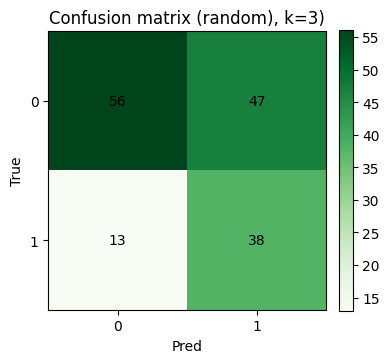


=== Случайные признаки: ['Pregnancies', 'Glucose', 'Insulin', 'Age', 'SkinThickness'], k=5 ===
Train size: 614
Outcome
0.0    397
1.0    217
Name: count, dtype: int64

Test size: 154
Outcome
0.0    103
1.0     51
Name: count, dtype: int64

Оценка модели:  0.7077922077922078


,Pregnancies,Glucose,Insulin,Age,SkinThickness
0,0.000000,0.883871,0.596154,0.083333,0.402174
1,0.058824,0.645161,NaN,0.116667,0.358696
2,0.235294,0.658065,NaN,0.666667,NaN
3,0.529412,0.722581,0.169471,0.350000,0.228261
4,0.117647,0.535484,0.313702,0.066667,0.184783



Матрица ошибок:
Pred   0   1
True        
0     96   7
1     38  13


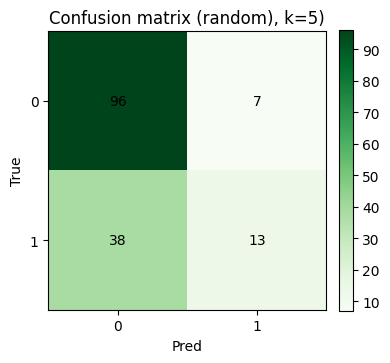


=== Случайные признаки: ['BloodPressure', 'Age', 'SkinThickness', 'Pregnancies'], k=10 ===
Train size: 614
Outcome
0.0    397
1.0    217
Name: count, dtype: int64

Test size: 154
Outcome
0.0    103
1.0     51
Name: count, dtype: int64

Оценка модели:  0.6493506493506493


,BloodPressure,Age,SkinThickness,Pregnancies
0,0.690476,0.083333,0.402174,0.000000
1,0.619048,0.116667,0.358696,0.058824
2,0.738095,0.666667,NaN,0.235294
3,0.666667,0.350000,0.228261,0.529412
4,0.333333,0.066667,0.184783,0.117647



Матрица ошибок:
Pred   0   1
True        
0     92  11
1     43   8


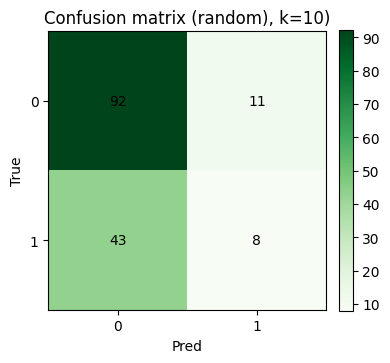

In [12]:
rng = np.random.default_rng(10)
rand_feats_1 = list(rng.choice(X_df.columns, size=4, replace=False))
rand_feats_2 = list(rng.choice(X_df.columns, size=5, replace=False))
rand_feats_3 = list(rng.choice(X_df.columns, size=4, replace=False))
rand_feats = [rand_feats_1, rand_feats_2, rand_feats_3]

ks = [3, 5, 10]

for i, k in enumerate(ks):
    print(f"\n=== Случайные признаки: {rand_feats[i]}, k={k} ===")
    y_pred_fix, y_test_fix = run_knn_report(rand_feats[i], k=k, seed=42)
    cm_fix = confusion_matrix_df(y_test_fix, y_pred_fix, labels=(0,1))
    print("\nМатрица ошибок:")
    print(cm_fix)
    plot_confusion_matrix(cm_fix, title=f"Confusion matrix (random), k={k})")


### Модель 2: Фиксированный набор признаков, который выбирается заранее.

Выберем фиксированный набор признаков для модели и проведем оценку при k=3, k=5, k=10.


=== Фиксированные признаки: ['Glucose', 'BMI', 'Age', 'BloodPressure'], k=3 ===
Train size: 614
Outcome
0.0    397
1.0    217
Name: count, dtype: int64

Test size: 154
Outcome
0.0    103
1.0     51
Name: count, dtype: int64

Оценка модели:  0.6688311688311688


,Glucose,BMI,Age,BloodPressure
0,0.883871,0.609223,0.083333,0.690476
1,0.645161,0.560680,0.116667,0.619048
2,0.658065,0.315534,0.666667,0.738095
3,0.722581,0.390777,0.350000,0.666667
4,0.535484,0.230583,0.066667,0.333333



Матрица ошибок:
Pred   0   1
True        
0     72  31
1     20  31


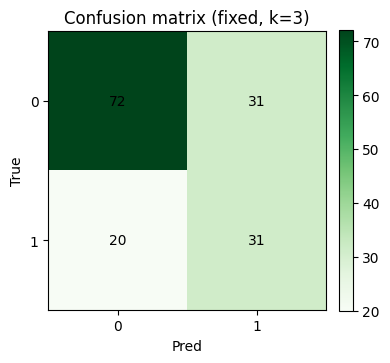


=== Фиксированные признаки: ['Glucose', 'BMI', 'Age', 'BloodPressure'], k=5 ===
Train size: 614
Outcome
0.0    397
1.0    217
Name: count, dtype: int64

Test size: 154
Outcome
0.0    103
1.0     51
Name: count, dtype: int64

Оценка модели:  0.7207792207792207


,Glucose,BMI,Age,BloodPressure
0,0.883871,0.609223,0.083333,0.690476
1,0.645161,0.560680,0.116667,0.619048
2,0.658065,0.315534,0.666667,0.738095
3,0.722581,0.390777,0.350000,0.666667
4,0.535484,0.230583,0.066667,0.333333



Матрица ошибок:
Pred   0   1
True        
0     84  19
1     24  27


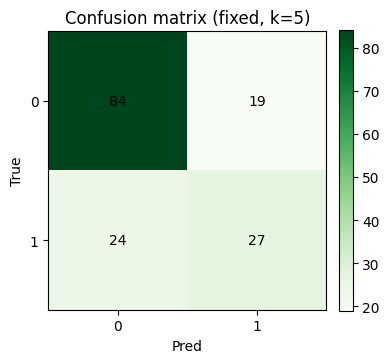


=== Фиксированные признаки: ['Glucose', 'BMI', 'Age', 'BloodPressure'], k=10 ===
Train size: 614
Outcome
0.0    397
1.0    217
Name: count, dtype: int64

Test size: 154
Outcome
0.0    103
1.0     51
Name: count, dtype: int64

Оценка модели:  0.7077922077922078


,Glucose,BMI,Age,BloodPressure
0,0.883871,0.609223,0.083333,0.690476
1,0.645161,0.560680,0.116667,0.619048
2,0.658065,0.315534,0.666667,0.738095
3,0.722581,0.390777,0.350000,0.666667
4,0.535484,0.230583,0.066667,0.333333



Матрица ошибок:
Pred   0   1
True        
0     88  15
1     30  21


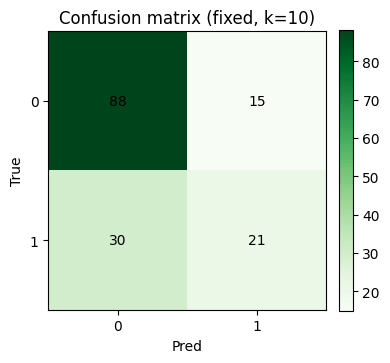

In [13]:
fixed_features = ['Glucose', 'BMI', 'Age', 'BloodPressure']

for k in [3, 5, 10]:
    print(f"\n=== Фиксированные признаки: {fixed_features}, k={k} ===")
    y_pred_fix, y_test_fix = run_knn_report(fixed_features, k=k, seed=42)
    cm_fix = confusion_matrix_df(y_test_fix, y_pred_fix, labels=(0,1))
    print("\nМатрица ошибок:")
    print(cm_fix)
    plot_confusion_matrix(cm_fix, title=f"Confusion matrix (fixed, k={k})")
